### 1. IMPORTING LIBRARIES

In [220]:
# import libraries and dependencies
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# import modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##### 2. READ DATA 

In [164]:
# read data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3088,5751-USDBL,Male,0,Yes,Yes,46,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,81.00,3846.35,No
3224,4013-UBXWQ,Female,0,No,No,7,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,74.65,521.1,Yes
1876,3946-JEWRQ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.20,4563,No


#### 3.EXPLORATORY DATA ANALYSIS 

In [165]:
# first, customer ID is useless. Need to be dropped
df.drop('customerID', axis=1, inplace=True)

In [166]:
# check number of rows and columns
df.shape

(7043, 20)

In [167]:
# check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


###### The dataset has no  missing values 

In [168]:
# from above, my TotalCharges attribute is object, check the unique values
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [169]:
# check the dataframe where TotalCharges has missing values
df_blank = df.loc[df['TotalCharges'] == " "]

In [170]:
# number of rows in df that have missing values
print(len(df.loc[df['TotalCharges'] == " "]))

11


In [171]:
# drop the 11 rows
df1 = df.loc[df['TotalCharges'] != " "]
df1.shape

(7032, 20)

In [172]:
# fill the rows and column with trailing spaces
# df.loc[(df['TotalCharges']) == ' ', 'TotalCharges'] = 0

In [173]:
# check data types
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [174]:
# convert to numeric data type
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
print(df1['TotalCharges'].unique())
print(df1['TotalCharges'].dtype)

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
float64


In [175]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
1451.1      1
3415.25     1
5289.05     1
2139.2      1
468.35      1
Name: TotalCharges, Length: 6531, dtype: int64

In [176]:
# check data types
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [177]:
# check for data description
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


###### data need scaling 

In [178]:
# customers not leaving
df1[df1['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


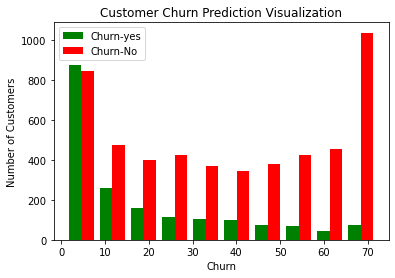

In [181]:
# TENURE - How loyal the customer is


tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn-yes', 'Churn-No'])

plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

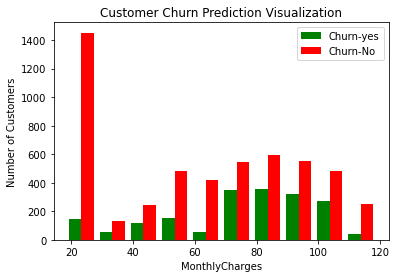

In [182]:
# Monthly Charges


tenure_churn_no = df1[df1['Churn'] == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].MonthlyCharges

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn-yes', 'Churn-No'])

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.legend()

In [186]:
# check unique columns on categorical variables
def unique_cols_value(df):
    
    for col in df1:
        if df1[col].dtypes == 'object':
            print(f'{col}: {df1[col].unique()}')

In [187]:
unique_cols_value(df1)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [188]:
# replace the No internet service with no
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [189]:
# print the unique values
unique_cols_value(df1)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [190]:
# create an array if yes and no columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
               'Churn'
              ]

# replace the values in the columns with 1 or 0
for col in yes_no_cols:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

In [191]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [192]:
# encode the gender column
df1.gender.replace({'Male':1, 'Female':0}, inplace=True)

In [193]:
# do a one hot encoding on 3 columns
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1555,0,0,1,0,53,1,0,1,1,1,...,0,1,0,0,1,0,1,0,0,0
1636,0,0,0,0,48,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4125,1,0,1,0,43,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
4935,1,1,1,0,45,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [194]:
# check the data types
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [197]:
# scale the data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3934,0,0,0,1,0.126761,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
5587,0,1,0,0,0.633803,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
5530,0,0,0,0,0.915493,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [203]:
# recheck unique values
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

### Modelling

In [204]:
# independent and dependent variables
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [205]:
# do a train_test_split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [206]:
# check shape for training data
X_train.shape

(5625, 26)

In [207]:
# check shape for testing data
X_test.shape

(1407, 26)

In [209]:
len(X_train.columns)

26

In [211]:
# create a neural network
model = keras.Sequential([
    
    layers.Dense(20, input_shape=[26], activation='relu'),
#     layers.Dense(15, activation='relu')
    layers.Dense(1, activation='sigmoid')
    
])


# compile layer
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# fit your model to the data
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.4991 - accuracy: 0.7531
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.7892
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7986
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8007
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8062
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accura

In [212]:
# evaluate the model
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7989


[0.43045687675476074, 0.7988628149032593]

In [213]:
# do predictions
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.23107143],
       [0.07954981],
       [0.23543262],
       [0.78052104],
       [0.88938785]], dtype=float32)

In [214]:
# convert the above predictions to whole numbers
y_pred = []
for x in yp:
    if x>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [215]:
y_pred[:10]

[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [216]:
y_test[:10]

5561    0
5814    0
2645    0
3983    1
6438    1
4561    0
6271    0
4081    1
3937    0
1357    0
Name: Churn, dtype: int64

### Classification Report

In [221]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1038
           1       0.63      0.55      0.59       369

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [2]:
!pip install imblearn

FileNotFoundError: [WinError 2] The system cannot find the file specified

Text(69.0, 0.5, 'Truth')

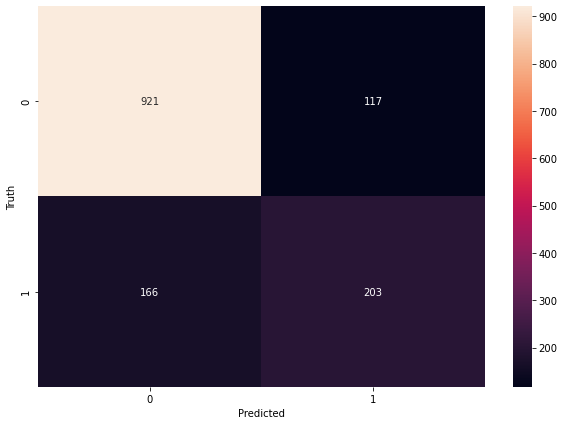

In [231]:
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [223]:
# Check accuracy: correct values over total values
(921+203)/(921+117+166+203)

0.798862828713575

In [230]:
# check precision: number of true predicted / total predicted
print('Total stayed(0): ' +str((921)/(921+166)))
print('Total left(1): ' +str((203)/(203+117)))

Total stayed(0): 0.8472861085556578
Total left(1): 0.634375


In [232]:
# check recall: number of true predicted / total observations
print('Total stayed(0): ' +str((921)/(921+117)))
print('Total left(1): ' +str((203)/(203+166)))

Total stayed(0): 0.8872832369942196
Total left(1): 0.5501355013550135
